In [4]:
#!pip install -e .
import toySCRNAsim
import matplotlib.pyplot as plt
import numpy as np

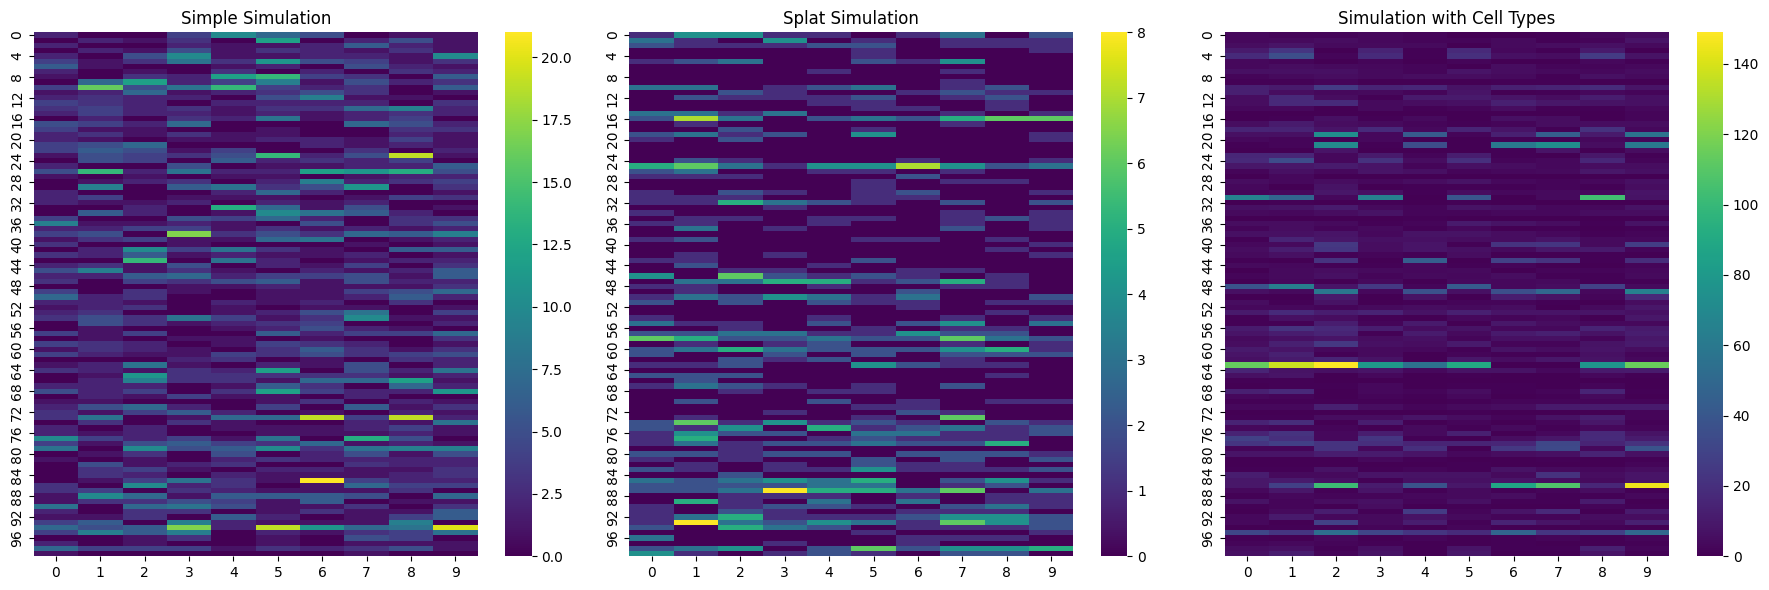

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data using the three functions
simple_data = toySCRNAsim.simple_sim(N=10, G=100)
splat_data = toySCRNAsim.splat_sim(N=10, G=100)
sim_ct_data, cell_labels, de_info = toySCRNAsim.sim_with_cell_types(N=10, G=100,K=2)

# Visualize the heatmaps for the three datasets
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(simple_data.values, ax=axs[0], cmap='viridis')
axs[0].set_title('Simple Simulation')

sns.heatmap(splat_data.values, ax=axs[1], cmap='viridis')
axs[1].set_title('Splat Simulation')

sns.heatmap(sim_ct_data.values, ax=axs[2], cmap='viridis')
axs[2].set_title('Simulation with Cell Types')

plt.tight_layout()
plt.show()


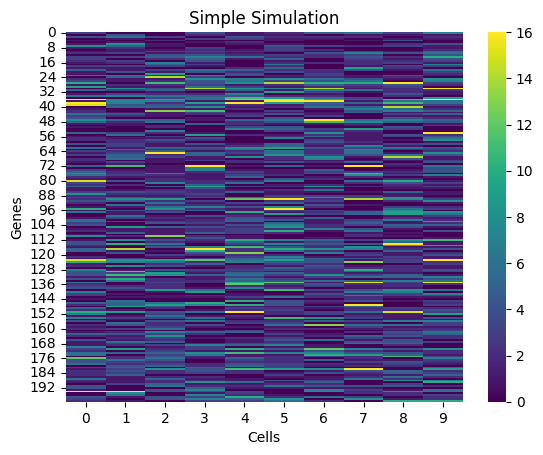

In [6]:
simple_data = toySCRNAsim.simple_sim(N=10, G=200)
sns.heatmap(simple_data.values, cmap='viridis',vmin=0, vmax=np.percentile(simple_data.values, 99))
plt.xlabel('Cells')
plt.ylabel('Genes')
plt.title('Simple Simulation')
plt.show()

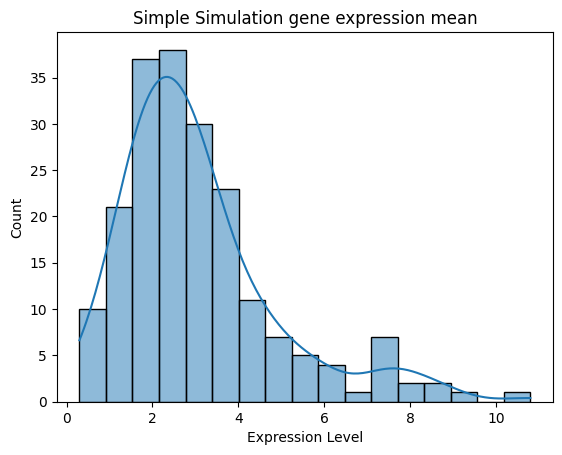

In [7]:
sns.histplot(simple_data.mean(axis=1), kde=True)
plt.title('Simple Simulation gene expression mean')
plt.xlabel('Expression Level')
plt.show()

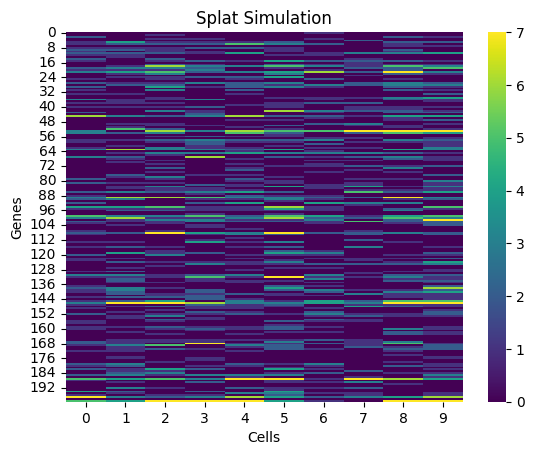

In [8]:
splat_data = toySCRNAsim.splat_sim(N=10, G=200)
sns.heatmap(splat_data.values, cmap='viridis',vmin=0, vmax=np.percentile(splat_data.values, 99))
plt.xlabel('Cells')
plt.ylabel('Genes')
plt.title('Splat Simulation')
plt.show()

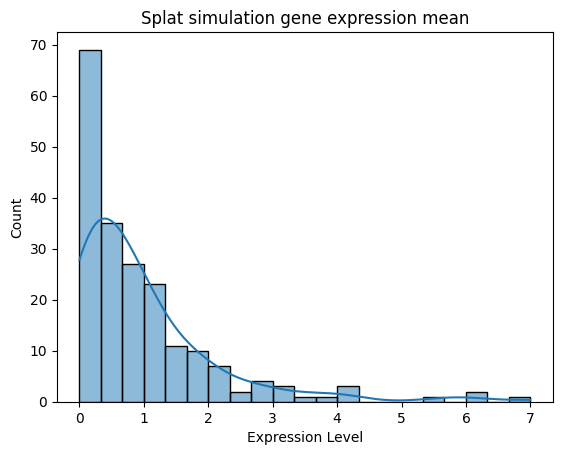

In [9]:
#plot hist of gene expression
sns.histplot(splat_data.mean(axis=1), kde=True)
plt.title('Splat simulation gene expression mean')
plt.xlabel('Expression Level')
plt.show()

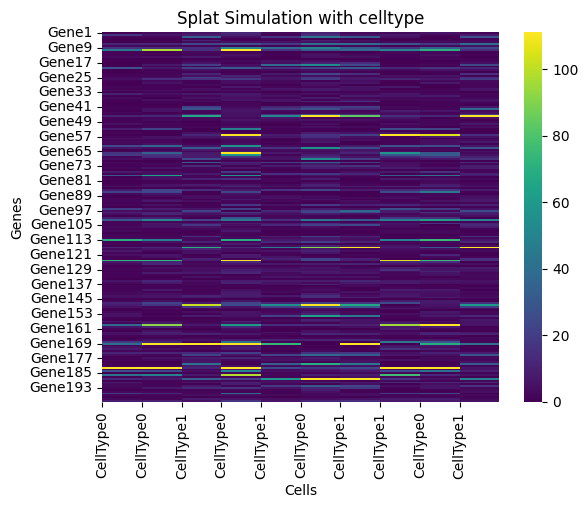

In [10]:
celltype_data = toySCRNAsim.sim_with_cell_types(N=10, G=200,K=2)

sns.heatmap(celltype_data[0], cmap='viridis',vmin=0, vmax=np.percentile(celltype_data[0].values, 99))
plt.xlabel('Cells')
plt.ylabel('Genes')
plt.xticks(range(10), cell_labels,rotation=90)
plt.title('Splat Simulation with celltype')
plt.show()

In [11]:
celltype_data[2]

,CellType0,CellType1
Gene1,False,False
Gene2,False,False
Gene3,True,False
Gene4,False,True
Gene5,False,True
...,...,...
Gene196,False,True
Gene197,False,False
Gene198,True,False
Gene199,False,False


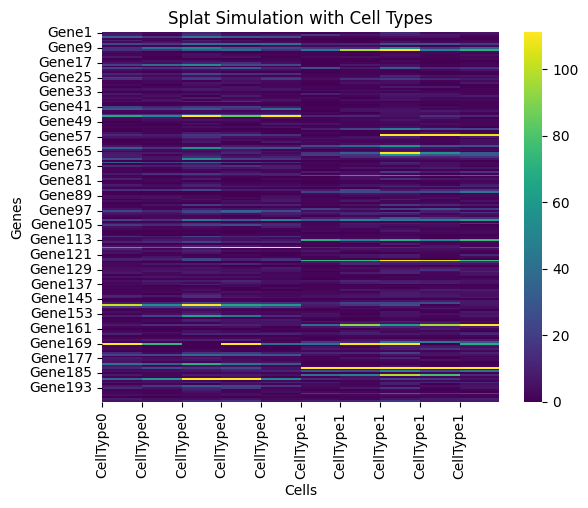

In [12]:
cell_labels = celltype_data[1].values
sorted_indices = np.argsort(cell_labels)
sorted_data = celltype_data[0].iloc[:, sorted_indices]
sns.heatmap(sorted_data, cmap='viridis', vmin=0, vmax=np.percentile(celltype_data[0].values, 99))
plt.xlabel('Cells')
plt.ylabel('Genes')
plt.xticks(ticks=range(10), labels=cell_labels[sorted_indices], rotation=90)
plt.title('Splat Simulation with Cell Types')
plt.show()


In [13]:
from sklearn.cluster import KMeans
celltype_data = toySCRNAsim.sim_with_cell_types(N=100, G=200,K=2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(sorted_data.T)
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

# Clustering Analysis

In [14]:
count_matrix, cell_labels, de_info = toySCRNAsim.sim_with_cell_types(N=400, G=1000,K=6)

In [15]:
count_matrix

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,Cell10,...,Cell391,Cell392,Cell393,Cell394,Cell395,Cell396,Cell397,Cell398,Cell399,Cell400
Gene1,0,4,1,4,9,14,1,1,0,6,...,1,1,1,3,5,4,6,1,0,5
Gene2,11,5,15,19,0,11,0,29,10,132,...,13,12,0,6,88,0,98,2,60,96
Gene3,0,1,2,1,0,0,11,1,0,12,...,3,0,0,0,14,0,11,0,1,12
Gene4,2,3,11,10,0,23,0,5,5,1,...,5,1,1,6,1,1,1,3,7,2
Gene5,19,9,94,9,13,6,8,52,34,8,...,6,54,5,3,4,7,3,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gene996,1,0,1,1,14,0,0,1,3,2,...,1,2,14,0,1,17,0,10,1,0
Gene997,3,3,13,5,6,5,38,6,5,26,...,1,3,2,4,33,3,50,7,3,37
Gene998,33,4,22,0,36,5,1,28,21,2,...,1,44,17,3,2,24,4,35,6,2
Gene999,3,44,7,6,9,87,4,17,6,13,...,10,9,7,45,3,7,8,9,63,2


In [16]:
# !pip install umap-learn
# !pip install numpy==2.0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


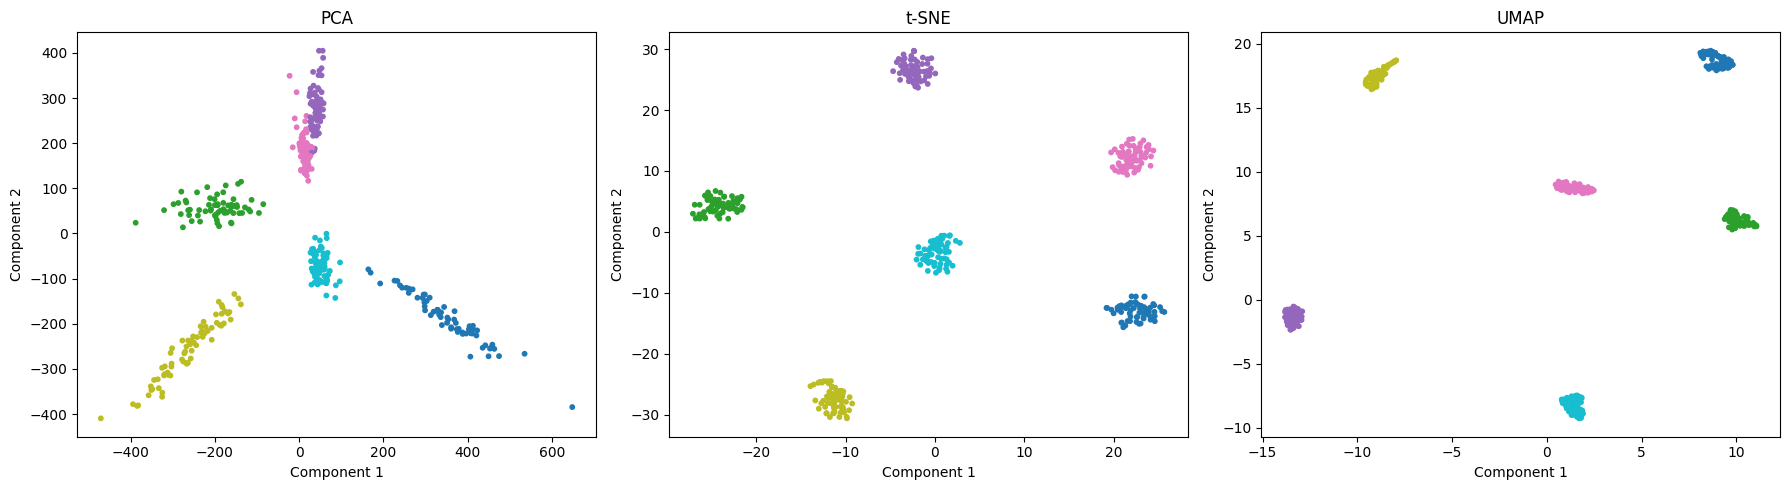

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

encoded_labels = LabelEncoder().fit_transform(cell_labels)

# PCA
pca_result = PCA(n_components=2).fit_transform(count_matrix.T)

# t-SNE
tsne_result = TSNE(n_components=2, random_state=42).fit_transform(count_matrix.T)

# UMAP
umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(count_matrix.T)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=encoded_labels, cmap='tab10', s=10)
axes[0].set_title("PCA")
axes[0].set_xlabel("Component 1")
axes[0].set_ylabel("Component 2")

axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=encoded_labels, cmap='tab10', s=10)
axes[1].set_title("t-SNE")
axes[1].set_xlabel("Component 1")
axes[1].set_ylabel("Component 2")

axes[2].scatter(umap_result[:, 0], umap_result[:, 1], c=encoded_labels, cmap='tab10', s=10)
axes[2].set_title("UMAP")
axes[2].set_xlabel("Component 1")
axes[2].set_ylabel("Component 2")

plt.tight_layout()
plt.show()